# THE SPARKS FOUNDATION

# Data Science & Business Analytics Internship

## TASK 1 - Prediction using Supervised ML 

### To Predict the percentage of an student based on the no. of study hours. 

## Author - Bhanoday S

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Data

In [2]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Dataset imported successfully")

Dataset imported successfully


# Exploratory Data Analysis

In [3]:
dataset.shape

(25, 2)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
#Checking the no. of null values in dataset
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There is no null value in the Dataset so, we can now visualize our Data.

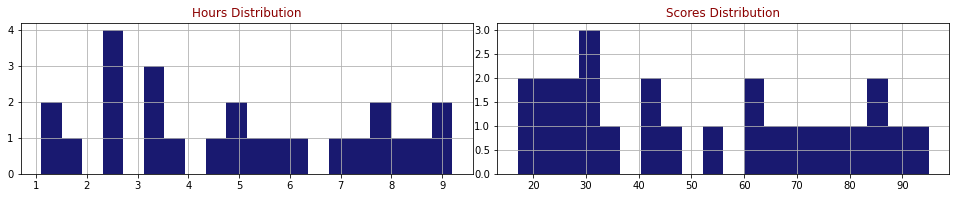

In [9]:
#Representing hours and scores in histogram
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()

draw_histograms(dataset,dataset.columns,8,3)

### Correlation Matrix

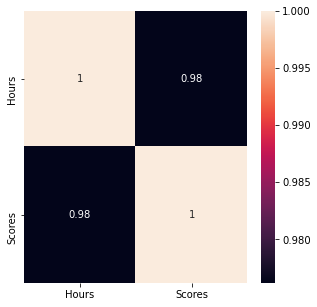

In [10]:
import seaborn as sns
corrmat = dataset.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corrmat, annot=True)
plt.show()

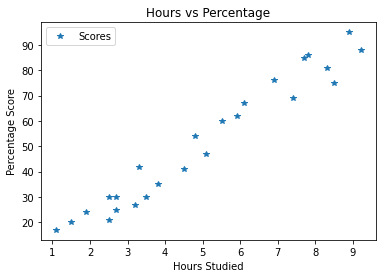

In [11]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the Data 

#### Now we  divide the data into attributes and  labels. Attributes are the independent variables while labels are dependent variables whose values are to be predicted.
Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. 

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

## Splitting the Data 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### We have split 75% of the data to training set while 25% of the data to test set 

## Linear Regression Model

#### Training the Algorithm

In [14]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression()
regression.fit(X_train, y_train)
print("Training is Done")

Training is Done


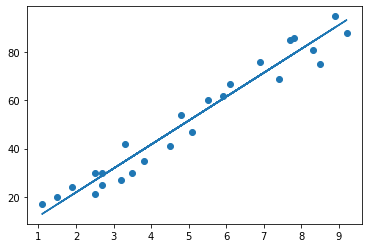

In [15]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [16]:
#Prints the value of intercept
print(regression.intercept_)

1.932204253151646


In [17]:
#prints the value of slope
print(regression.coef_)

[9.94167834]


#### Therefore the regression line is y = 9.941*X + 1.932. This means that for every one unit of change in hours studied, the change in the score is about 9.94%. 

## Making Predictions 

In [18]:
y_pred = regression.predict(X_test) #The y_pred contains all the predicted values for the input values in the test data
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [i for i in y_pred]})
prediction #prints the Predicted Percentage of Marks

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


#### To compare the actual output values for X_test with the predicted values, execute the following script:



In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df #Compares Actuval vs Predicted values

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Plotting Actual vs Predicted Marks

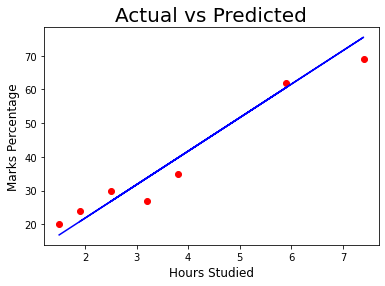

In [20]:
plt.scatter(x=X_test, y=y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Evaluating the Model 

##### For regression models, the commonly used evaluation metrics are Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE).

In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


#### We can see that the value of mean absolute error is 4.13 and root mean squared error is 4.50. This means that our algorithm did a decent job.

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [28]:
hours = [9.25]
answer = regression.predict([hours])
print("Predicted Score = {}".format(answer))

Predicted Score = [93.89272889]
